In [1]:
import numpy as np
import openfoamparser_mai as Ofpp
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat
data = loadmat("../data/raw/cylinder_nektar_wake.mat")

In [14]:
C_low = Ofpp.parse_internal_field('../data/raw/C_high')

In [4]:
import os 

directory_path = '../data/raw/data_wage/low_dim/vel3.0/'
directory_files = os.listdir(directory_path)

In [5]:
directory_files.remove('constant')
directory_files.remove('system')


In [6]:
directory_files.remove('0')

In [7]:
directory_files = sorted(directory_files)

In [9]:
import numpy as np
U_file = []
for i in directory_files: 
    U = Ofpp.parse_internal_field('../data/raw/data_wage/low_dim/vel3.0/'+i+'/U')
    U_new = U[:,0]
    U_file.append(U_new)

In [10]:
import numpy as np
V_file = []
for i in directory_files: 
    U = Ofpp.parse_internal_field('../data/raw/data_wage/low_dim/vel3.0/'+i+'/U')
    V_new = U[:,1]
    V_file.append(V_new)

In [11]:
import numpy as np
p_file = []
for i in directory_files: 
    p = Ofpp.parse_internal_field('../data/raw/data_wage/low_dim/vel3.0/'+i+'/p')
    p_new = p
    p_file.append(p_new)

In [ ]:
#U that returns data loader 

np_U = np.concatenate(U_file, axis=0)
np_V = np.concatenate(V_file, axis=0)
np_p = np.concatenate(p_file, axis=0)

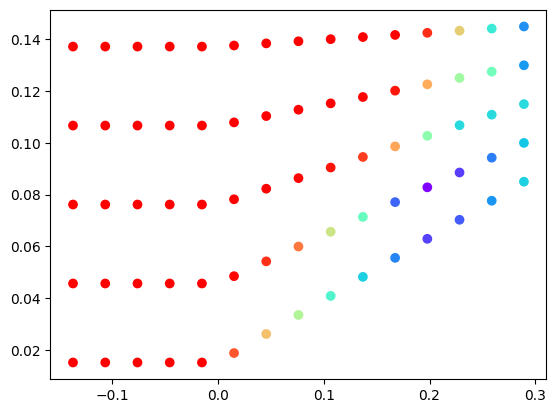

In [18]:
plt.scatter(C_low[:, 0:1], C_low[:, 1:2], c=U_file[-4], cmap='rainbow') 

In [20]:
T = len(directory_files)
N = C_low.shape[0]
XX = np.tile(C_low[:, 0:1], (1, T))  # N x T
YY = np.tile(C_low[:, 1:2], (1, T))  # N x T
TT = np.tile(np.array(list(map(float, directory_files))).reshape(-1, 1), (1, N)).T  # N x T


x = XX.flatten()[:, None]  # NT x 1
y = YY.flatten()[:, None]  # NT x 1
t = TT.flatten()[:, None]  # NT x 1

In [23]:
#а вот так мы эти картинки рисуем 
import matplotlib.pyplot as plt

[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = [x, y, t, np_U, np_V, np_p]
time_t = 0.02
x_true = ob_x[ob_t == time_t]
y_true = ob_y[ob_t == time_t]
# u_true = ob_u[ob_t == time_t]
u_true = U_file[-4]
# x_true = x_true.astype('float')
# y_true = y_true.astype('float')
# u_true = u_true.astype('float')
fig, ax = plt.subplots()
cntr1 = ax.tricontourf(C_low[:, 0], C_low[:, 1], u_true, levels=80, cmap="rainbow")
# cb1 = plt.colorbar(cntr1, ax=ax)
ax.set_title("u-Reference solution " + "(t=" + str() + ")", fontsize=9.5)
ax.axis("scaled")
ax.set_xlabel("X", fontsize=7.5)
ax.set_ylabel("Y", fontsize=7.5)

NameError: name 'ob_x' is not defined

**ВОТ ЗДЕСЬ КОНЕЦ**

In [ ]:
pip install deepxde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.1 MB/s eta 0:00:00


In [59]:
from scipy.io import loadmat


data = loadmat("../data/raw/cylinder_nektar_wake.mat")
U_star = data["U_star"]  # N x 2 x T
P_star = data["p_star"]  # N x T
t_star = data["t"]  # T x 1
X_star = data["X_star"]  # N x 2
N = X_star.shape[0]
T = t_star.shape[0]
    # Rearrange Data
XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
TT = np.tile(t_star, (1, N)).T  # N x T
print(T)
print(N)
print(t_star.shape)
print(X_star.shape)
print(TT.shape)
UU = U_star[:, 0, :]  # N x T
VV = U_star[:, 1, :]  # N x T
PP = P_star  # N x T
x = XX.flatten()[:, None]  # NT x 1
y = YY.flatten()[:, None]  # NT x 1
t = TT.flatten()[:, None]  # NT x 1
u = UU.flatten()[:, None]  # NT x 1
v = VV.flatten()[:, None]  # NT x 1
p = PP.flatten()[:, None]  # NT x 1
# training domain: X × Y = [1, 8] × [−2, 2] and T = [0, 7]
data1 = np.concatenate([x, y, t, u, v, p], 1)
data2 = data1[:, :][data1[:, 2] <= 7]
data3 = data2[:, :][data2[:, 0] >= 1]
data4 = data3[:, :][data3[:, 0] <= 8]
data5 = data4[:, :][data4[:, 1] >= -2]
data_domain = data5[:, :][data5[:, 1] <= 2]
# choose number of training points: num =7000
idx = np.random.choice(data_domain.shape[0], 1000, replace=False)
x_train = data_domain[idx, 0:1]
y_train = data_domain[idx, 1:2]
t_train = data_domain[idx, 2:3]
u_train = data_domain[idx, 3:4]
v_train = data_domain[idx, 4:5]
p_train = data_domain[idx, 5:6]


200
5000
(200, 1)
(5000, 2)
(5000, 200)


In [104]:
data.shape

(355000, 6)

In [60]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle
An inverse problem of the Navier-Stokes equation of incompressible flow around cylinder with Re=100
References: https://doi.org/10.1016/j.jcp.2018.10.045 Section 4.1.1
"""

import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re

# true values
C1true = 1.0
C2true = 0.01

# Load training data
def load_training_data(num):
    data = loadmat("cylinder_nektar_wake.mat")
    U_star = data["U_star"]  # N x 2 x T
    P_star = data["p_star"]  # N x T
    t_star = data["t"]  # T x 1
    X_star = data["X_star"]  # N x 2
    N = X_star.shape[0]
    T = t_star.shape[0]
    # Rearrange Data
    XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
    YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
    TT = np.tile(t_star, (1, N)).T  # N x T
    UU = U_star[:, 0, :]  # N x T
    VV = U_star[:, 1, :]  # N x T
    PP = P_star  # N x T
    x = XX.flatten()[:, None]  # NT x 1
    y = YY.flatten()[:, None]  # NT x 1
    t = TT.flatten()[:, None]  # NT x 1
    u = UU.flatten()[:, None]  # NT x 1
    v = VV.flatten()[:, None]  # NT x 1
    p = PP.flatten()[:, None]  # NT x 1
    # training domain: X × Y = [1, 8] × [−2, 2] and T = [0, 7]
    data1 = np.concatenate([x, y, t, u, v, p], 1)
    data2 = data1[:, :][data1[:, 2] <= 7]
    data3 = data2[:, :][data2[:, 0] >= 1]
    data4 = data3[:, :][data3[:, 0] <= 8]
    data5 = data4[:, :][data4[:, 1] >= -2]
    data_domain = data5[:, :][data5[:, 1] <= 2]
    # choose number of training points: num =7000
    idx = np.random.choice(data_domain.shape[0], num, replace=False)
    x_train = data_domain[idx, 0:1]
    y_train = data_domain[idx, 1:2]
    t_train = data_domain[idx, 2:3]
    u_train = data_domain[idx, 3:4]
    v_train = data_domain[idx, 4:5]
    p_train = data_domain[idx, 5:6]
    return [x_train, y_train, t_train, u_train, v_train, p_train]

# Parameters to be identified
C1 = dde.Variable(0.0)
C2 = dde.Variable(0.0)

# Define Navier Stokes Equations (Time-dependent PDEs)
def Navier_Stokes_Equation(x, y):
    u = y[:, 0:1]
    v = y[:, 1:2]
    p = y[:, 2:3]
    du_x = dde.grad.jacobian(y, x, i=0, j=0)
    du_y = dde.grad.jacobian(y, x, i=0, j=1)
    du_t = dde.grad.jacobian(y, x, i=0, j=2)
    dv_x = dde.grad.jacobian(y, x, i=1, j=0)
    dv_y = dde.grad.jacobian(y, x, i=1, j=1)
    dv_t = dde.grad.jacobian(y, x, i=1, j=2)
    dp_x = dde.grad.jacobian(y, x, i=2, j=0)
    dp_y = dde.grad.jacobian(y, x, i=2, j=1)
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    continuity = du_x + dv_y
    x_momentum = du_t + C1 * (u * du_x + v * du_y) + dp_x - C2 * (du_xx + du_yy)
    y_momentum = dv_t + C1 * (u * dv_x + v * dv_y) + dp_y - C2 * (dv_xx + dv_yy)
    return [continuity, x_momentum, y_momentum]

# Define Spatio-temporal domain
# Rectangular
Lx_min, Lx_max = 1.0, 8.0
Ly_min, Ly_max = -2.0, 2.0
# Spatial domain: X × Y = [1, 8] × [−2, 2]
space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])
# Time domain: T = [0, 7]
time_domain = dde.geometry.TimeDomain(0, 7)
# Spatio-temporal domain
geomtime = dde.geometry.GeometryXTime(space_domain, time_domain)

# Get the training data: num = 7000
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = [x_train, y_train, t_train, u_train, v_train, p_train]
ob_xyt = np.hstack((ob_x, ob_y, ob_t))
observe_u = dde.icbc.PointSetBC(ob_xyt, ob_u, component=0)
observe_v = dde.icbc.PointSetBC(ob_xyt, ob_v, component=1)

# Training datasets and Loss
data = dde.data.TimePDE(
    geomtime,
    Navier_Stokes_Equation,
    [observe_u, observe_v],
    num_domain=700,
    num_boundary=200,
    num_initial=100,
    anchors=ob_xyt,
)

# Neural Network setup
layer_size = [3] + [50] * 6 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)

# callbacks for storing results
fnamevar = "variables.dat"
variable = dde.callbacks.VariableValue([C1, C2], period=100, filename=fnamevar)

# Compile, train and save model
# model.compile("adam", lr=1e-3, external_trainable_variables=[C1, C2])
# loss_history, train_state = model.train(
#     iterations=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
# )
#dde.saveplot(loss_history, train_state, issave=True, isplot=True)
model.compile("adam", lr=1e-4, external_trainable_variables=[C1, C2])
loss_history, train_state = model.train(
    epochs=10000, callbacks=[variable], display_every=1000, disregard_previous_best=True
)
dde.saveplot(loss_history, train_state, issave=True, isplot=True)
# model.save(save_path = "./NS_inverse_model/model")
f = model.predict(ob_xyt, operator=Navier_Stokes_Equation)
print("Mean residual:", np.mean(np.absolute(f)))

# Plot Variables:
# reopen saved data using callbacks in fnamevar
lines = open(fnamevar, "r").readlines()
# read output data in fnamevar
Chat = np.array(
    [
        np.fromstring(
            min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line), key=len),
            sep=",",
        )
        for line in lines
    ]
)
l, c = Chat.shape
plt.semilogy(range(0, l * 100, 100), Chat[:, 0], "r-")
plt.semilogy(range(0, l * 100, 100), Chat[:, 1], "k-")
plt.semilogy(range(0, l * 100, 100), np.ones(Chat[:, 0].shape) * C1true, "r--")
plt.semilogy(range(0, l * 100, 100), np.ones(Chat[:, 1].shape) * C2true, "k--")
plt.legend(["C1hat", "C2hat", "True C1", "True C2"], loc="right")
plt.xlabel("Epochs")
plt.title("Variables")
plt.show()

# Plot the velocity distribution of the flow field:
for t in range(0, 8):
    [ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=140000)
    xyt_pred = np.hstack((ob_x, ob_y, t * np.ones((len(ob_x), 1))))
    uvp_pred = model.predict(xyt_pred)
    x_pred, y_pred, t_pred = xyt_pred[:, 0], xyt_pred[:, 1], xyt_pred[:, 2]
    u_pred, v_pred, p_pred = uvp_pred[:, 0], uvp_pred[:, 1], uvp_pred[:, 2]
    x_true = ob_x[ob_t == t]
    y_true = ob_y[ob_t == t]
    u_true = ob_u[ob_t == t]
    fig, ax = plt.subplots(2, 1)
    cntr0 = ax[0].tricontourf(x_pred, y_pred, u_pred, levels=80, cmap="rainbow")
    cb0 = plt.colorbar(cntr0, ax=ax[0])
    cntr1 = ax[1].tricontourf(x_true, y_true, u_true, levels=80, cmap="rainbow")
    cb1 = plt.colorbar(cntr1, ax=ax[1])
    ax[0].set_title("u-PINN " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[0].axis("scaled")
    ax[0].set_xlabel("X", fontsize=7.5, family="Arial")
    ax[0].set_ylabel("Y", fontsize=7.5, family="Arial")
    ax[1].set_title("u-Reference solution " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[1].axis("scaled")
    ax[1].set_xlabel("X", fontsize=7.5, family="Arial")
    ax[1].set_ylabel("Y", fontsize=7.5, family="Arial")
    fig.tight_layout()
    plt.show()

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.000092 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [3.42e-02, 1.22e-02, 8.21e-03, 3.13e-01, 4.41e-01]    [3.42e-02, 1.22e-02, 8.21e-03, 3.13e-01, 4.41e-01]    []  


KeyboardInterrupt: 

In [ ]:
u_pred.shape, u_true.shape

((140000,), (1955,))

In [ ]:
from deepxde.icbc.boundary_conditions import DirichletBC
from deepxde.geometry.geometry_2d import Polygon
from tensorflow.keras.backend import set_floatx
from deepxde.callbacks import EarlyStopping
from deepxde.nn import FNN
from deepxde.data.pde import PDE
from deepxde.model import Model
from deepxde.backend import tf
import numpy as np


set_floatx("float64")


def wall_top_boundary(x, on_boundary):
    """Checks for points on top wall boundary"""
    return on_boundary and np.isclose(x[1], 2.0)


def wall_bottom_boundary(x, on_boundary):
    """Checks for points on bottom wall boundary"""
    return on_boundary and np.isclose(x[1], 0.0)


def wall_mid_horizontal_boundary(x, on_boundary):
    """Check for points on step horizontal boundary"""
    return on_boundary and (np.isclose(x[1], 1.0) and x[0] < 2.0)


def wall_mid_vertical_boundary(x, on_boundary):
    """Check for points on step horizontal boundary"""
    return on_boundary and (x[1] < 1.0 and np.isclose(x[0], 2.0))


def outlet_boundary(x, on_boundary):
    """Implements the outlet boundary with zero y-velocity component"""
    return on_boundary and np.isclose(x[0], 12.0)


def inlet_boundary(x, on_boundary):
    """Implements the inlet boundary with parabolic x-velocity component"""
    return on_boundary and np.isclose(x[0], 0.0)


def parabolic_velocity(x):
    """Parabolic velocity"""
    return (6 * (x[:, 1] - 1) * (2 - x[:, 1])).reshape(-1, 1)


def zero_velocity(x):
    """Zero velocity"""
    return np.zeros((x.shape[0], 1))


def output_transformer(inputs, outputs):
    """Apply output transforms to strictly enforce boundary conditions"""

    top_line = inputs[:, 1] - 2.0
    bottom_line = inputs[:, 1]
    mid_hor_line = inputs[:, 1] - 1.0
    mid_ver_line = inputs[:, 0] - 2.0
    outlet_line = inputs[:, 0] - 12.0
    inlet_line = inputs[:, 0]
    # velocity_profile = 6.0 * (inputs[:, 1] - 1.0) * (2.0 - inputs[:, 1])
    velocity_profile = 1.0

    u_multiplier = (top_line * bottom_line * mid_hor_line * mid_ver_line *
                    velocity_profile)
    v_multiplier = (top_line * bottom_line * mid_hor_line * mid_ver_line *
                    outlet_line * inlet_line)
    p_multiplier = 1.0

    return tf.transpose(
        tf.stack((
            u_multiplier * outputs[:, 0],
            v_multiplier * outputs[:, 1],
            p_multiplier * outputs[:, 2]
        ))
    )


def navier_stokes(x, y):
    """Navier-Stokes equation"""
    rho = 1.0
    nu = 0.01
    eps = 1e-8

    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]

    du = tf.gradients(u, x)[0]
    dv = tf.gradients(v, x)[0]
    dp = tf.gradients(p, x)[0]

    p_x, p_y = dp[:, 0:1], dp[:, 1:2]
    u_x, u_y = du[:, 0:1], du[:, 1:2]
    v_x, v_y = dv[:, 0:1], dv[:, 1:2]

    u_xx = tf.gradients(u_x, x)[0][:, 0:1]
    u_yy = tf.gradients(u_y, x)[0][:, 1:2]

    v_xx = tf.gradients(v_x, x)[0][:, 0:1]
    v_yy = tf.gradients(v_y, x)[0][:, 1:2]

    continuity = u_x + v_y + eps * p
    x_momentum = u * u_x + v * u_y + 1 / rho * p_x - nu * (u_xx + u_yy)
    y_momentum = u * v_x + v * v_y + 1 / rho * p_y - nu * (v_xx + v_yy)

    return [continuity, x_momentum, y_momentum]


if __name__ == '__main__':
    """
    Geometry
    --------
             (0, 2)       (12, 2)
              *------------*
        in -> |            |
        (0, 1)*--*(2,1)    . -> out
                 |         |
            (2,0)*---------*(12, 0)
    """
    geom = Polygon([
        [0.0, 2.0], [12.0, 2.0], [12.0, 0.0], [2.0, 0.0], [2.0, 1.0],
        [0.0, 1.0]
    ])

    inlet_x = DirichletBC(geom, parabolic_velocity, inlet_boundary,
                          component=0)
    inlet_y = DirichletBC(geom, zero_velocity, inlet_boundary, component=1)
    outlet = DirichletBC(geom, zero_velocity, outlet_boundary, component=1)
    wallt_x = DirichletBC(geom, zero_velocity, wall_top_boundary, component=0)
    wallt_y = DirichletBC(geom, zero_velocity, wall_top_boundary, component=1)
    wallb_x = DirichletBC(geom, zero_velocity, wall_bottom_boundary,
                          component=0)
    wallb_y = DirichletBC(geom, zero_velocity, wall_bottom_boundary,
                          component=1)
    wallsh_x = DirichletBC(geom, zero_velocity, wall_mid_horizontal_boundary,
                           component=0)
    wallsh_y = DirichletBC(geom, zero_velocity, wall_mid_horizontal_boundary,
                           component=1)
    wallsv_x = DirichletBC(geom, zero_velocity, wall_mid_vertical_boundary,
                           component=0)
    wallsv_y = DirichletBC(geom, zero_velocity, wall_mid_vertical_boundary,
                           component=1)

    data = PDE(
        geom, navier_stokes,
        [inlet_x, inlet_y, outlet, wallt_x, wallt_y, wallb_x,
         wallb_x, wallsh_x, wallsh_y, wallsv_x, wallsv_y], num_domain=10000,
        num_boundary=10000, num_test=10000
    )

    layer_size = [2] + [50] * 6 + [3]
    net = FNN(layer_size, "tanh", "Glorot uniform")
    # net.apply_output_transform(output_transformer)

    model = Model(data, net)
    model.compile("adam", lr=0.001)

    early_stopping = EarlyStopping(min_delta=1e-8, patience=40000)
    model.train(epochs=1000, display_every=1000, callbacks=[early_stopping],
                disregard_previous_best=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.129091 s



/usr/local/lib/python3.9/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 3.770965 s

Initializing variables...
Training model...

Step      Train loss                                                                                                                                      Test loss                                                                                                                                       Test metric
0         [8.44e-03, 1.77e-03, 2.12e-03, 1.49e+00, 9.72e-02, 6.71e-02, 3.86e-02, 2.05e-02, 4.06e-02, 4.06e-02, 1.21e-02, 1.19e-02, 8.12e-03, 1.51e-02]    [7.58e-03, 1.25e-03, 1.86e-03, 1.49e+00, 9.72e-02, 6.71e-02, 3.86e-02, 2.05e-02, 4.06e-02, 4.06e-02, 1.21e-02, 1.19e-02, 8.12e-03, 1.51e-02]    []  
1000      [1.55e-03, 5.81e-04, 1.41e-04, 1.78e-04, 1.95e-05, 5.80e-06, 2.64e-04, 2.88e-04, 7.56e-06, 7.56e-06, 1.15e-04, 4.73e-05, 1.07e-04, 3.72e-05]    [2.62e-03, 7.33e-04, 1.49e-04, 1.78e-04, 1.95e-05, 5.80e-06, 2.64e-04, 2.88e-04, 7.56e-06, 7.56e-06, 1.15e-04, 4.73e-05, 1.07e-04, 3.72e-05]    []  

Best model 

In [ ]:
def plot_points(points, color="k", marker="."):
    figure = plt.figure()
    axis = figure.add_subplot(111)
    axis.scatter(points[:, 0], points[:, 1], c=color, marker=marker)
    plt.show()

In [ ]:
points = data.test()[0]

In [ ]:
answers = model.predict(data.test()[0])

In [ ]:
answers

array([[ 0.07395576,  0.01772731, -0.23834735],
       [ 0.08201441,  0.01747685, -0.23832333],
       [ 0.09814854,  0.0169818 , -0.23827308],
       ...,
       [ 0.05718065, -0.03537434,  0.15250704],
       [ 0.24267831, -0.05373968,  0.15623955],
       [ 0.08200207, -0.00131344,  0.15705615]], dtype=float32)

In [ ]:
u, v, p = answers[:,0], answers[:,1], answers[:,2]

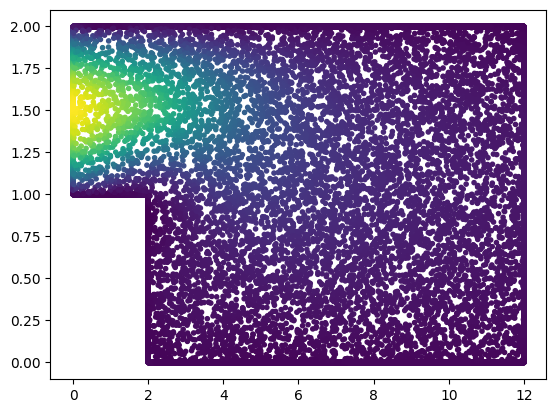

In [ ]:
plot_points(points, u)